#VPredicting with Classification

In [1744]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [1745]:
#Read the cleaned dataset
df = pd.read_csv("cleaned_data.csv")

In [1746]:
print((df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   model        1396 non-null   object
 1   model_detay  1396 non-null   object
 2   model_yili   1396 non-null   int64 
 3   fiyat        1396 non-null   int64 
 4   sehir        1396 non-null   object
 5   ilce         1396 non-null   object
 6   ilan_turu    1396 non-null   object
 7   tip          1396 non-null   object
 8   marka        1396 non-null   object
 9   motor_hacmi  1396 non-null   object
 10  motor_tipi   1396 non-null   object
 11  donanim      1396 non-null   object
dtypes: int64(2), object(10)
memory usage: 131.0+ KB
None


In [1747]:
#Set appropriate columns as categoricxal
df["model"]        = df["model"].astype("category")
df["model_detay"]  = df["model_detay"].astype("category")
df["sehir"]        = df["sehir"].astype("category")
df["ilce"]         = df["ilce"].astype("category")
df["ilan_turu"]    = df["ilan_turu"].astype("category")
df["tip"]          = df["tip"].astype("category")
df["marka"]        = df["marka"].astype("category")
df["motor_hacmi"]  = df["motor_hacmi"].astype("category")
df["motor_tipi"]   = df["motor_tipi"].astype("category")
df["donanim"]      = df["donanim"].astype("category")

In [1748]:
print((df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   model        1396 non-null   category
 1   model_detay  1396 non-null   category
 2   model_yili   1396 non-null   int64   
 3   fiyat        1396 non-null   int64   
 4   sehir        1396 non-null   category
 5   ilce         1396 non-null   category
 6   ilan_turu    1396 non-null   category
 7   tip          1396 non-null   category
 8   marka        1396 non-null   category
 9   motor_hacmi  1396 non-null   category
 10  motor_tipi   1396 non-null   category
 11  donanim      1396 non-null   category
dtypes: category(10), int64(2)
memory usage: 131.8 KB
None


In [1749]:
# Define categorical and numarical features
categorical_features = [
    'model',
    'model_detay',
    'sehir',
    'ilce',
    'ilan_turu',
    'tip',
    'marka',
    'motor_hacmi',
    'motor_tipi',
    'donanim'
]
numerical_features = [
    'model_yili',
]

In [1750]:
#Creste a pipeline for preprocessing
full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [1751]:
# Seperate features and target variable
X = df.drop('fiyat', axis=1) 
y = df['fiyat']

In [1752]:
# Create automatic bins for 6 equal-widdh intervals
min_fiyat = df['fiyat'].min()
max_fiyat = df['fiyat'].max()
bins = np.linspace(min_fiyat, max_fiyat, 7)  # 6 bins mean 7 edges
labels = [x for x in range(1, 7)]
y = pd.cut(df['fiyat'], bins=bins, labels=labels, include_lowest=True)

#Show class distribution
print("Class Distribution:")
print(y.value_counts().sort_index())

Class Distribution:
fiyat
1    210
2    458
3    308
4    265
5    100
6     55
Name: count, dtype: int64


In [1753]:
# merge class 6 into class 5
y = y.replace({6: 5})

In [1754]:
# check for missing values
print(y.isnull().sum())  # 0 çıkmalı

0


In [1755]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [1756]:
#Create pipeline for preprocessing and Random Forest model
model = Pipeline([
    ('preparation', full_pipeline),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [1757]:
# fit the model to the train data
model.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['model_yili']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['model', 'model_detay',
                                                   'sehir', 'ilce', 'ilan_turu',
                                                   'tip', 'marka',
                                                   'motor_hacmi', 'motor_tipi',
                                                   'donanim'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [1758]:
# predict the test data
y_pred = model.predict(X_test)

In [1759]:
# Print confisuion matrix
print(confusion_matrix(y_test, y_pred))

[[24  4  1  0  0]
 [ 3 87 10  0  0]
 [ 0 13 50  9  0]
 [ 0  4  4 37  0]
 [ 1  0  0  9 24]]


In [1760]:
# print classification report (precision, recall, f1 score, support)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.83      0.84        29
           2       0.81      0.87      0.84       100
           3       0.77      0.69      0.73        72
           4       0.67      0.82      0.74        45
           5       1.00      0.71      0.83        34

    accuracy                           0.79       280
   macro avg       0.82      0.78      0.80       280
weighted avg       0.80      0.79      0.79       280



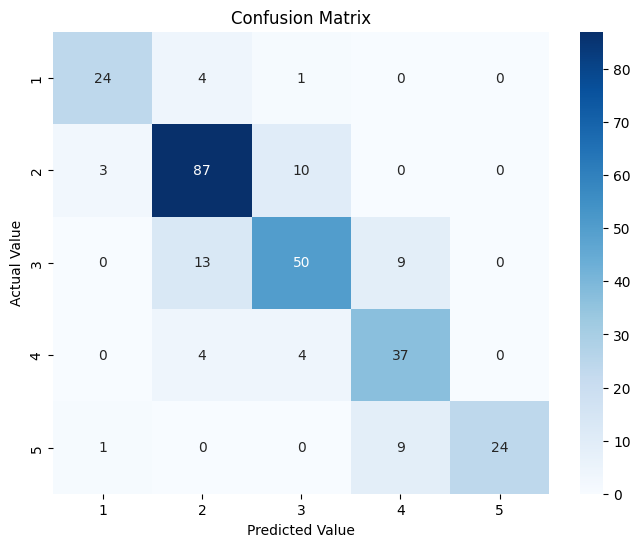

In [1761]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())

# visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()


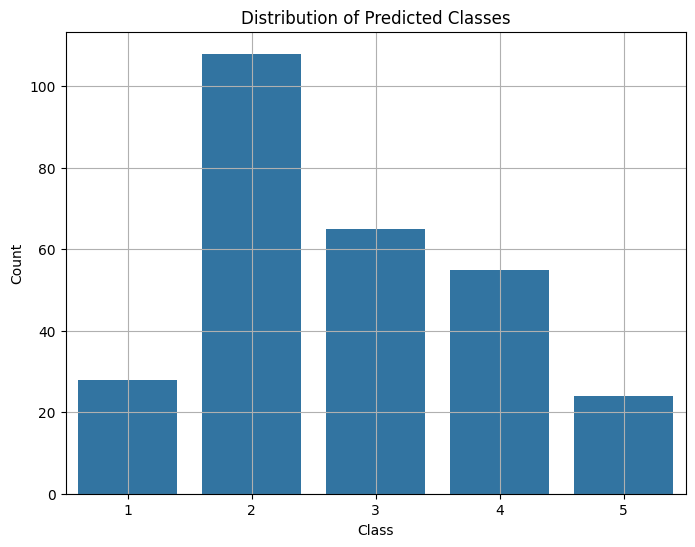

In [1762]:
# create a Dataframe to hold the results with actual and predicted values
df_results = pd.DataFrame({
    'Actual': y_test,
    'Predict': y_pred
})

# Visualize the distrubition of predicted classes
plt.figure(figsize=(8, 6))
sns.countplot(data=df_results, x='Predict', order=sorted(df_results['Predict'].unique()))
plt.title("Distribution of Predicted Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(True)
plt.show()

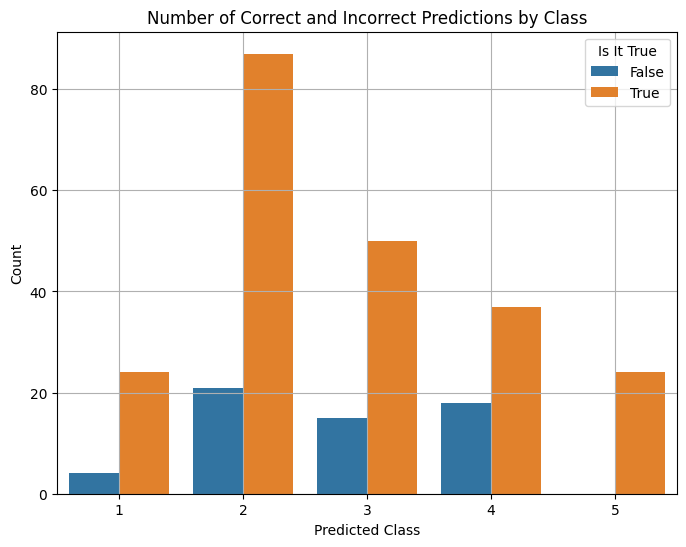

In [1763]:
# Add a a column to indicate if the prediction is correct or not
df_results['Is It True'] = df_results['Actual'] == df_results['Predict']

plt.figure(figsize=(8, 6))
sns.countplot(data=df_results, x='Predict', hue='Is It True', order=sorted(df_results['Predict'].unique()))
plt.title("Number of Correct and Incorrect Predictions by Class")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.grid(True)
plt.show()